[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/marmalux/Clientes_TelecomX/blob/main/Clientes_TelecomX.ipynb)


# Análisis de evasión de clientes en Telecom X

## Importación de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

#importar de una API y pasar a json
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos_api = requests.get(url)
datos_json=json.loads(datos_api.text)

In [2]:
# normalizar datos
datos_cliente = pd.json_normalize(datos_json)
datos_cliente.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3089,4304-TSPVK,No,Female,0,Yes,No,68,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.90,7843.55
3324,4628-WQCQQ,Yes,Male,0,No,Yes,35,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,One year,Yes,Electronic check,85.15,3030.6
4883,6682-VCIXC,No,Female,0,Yes,Yes,43,No,No phone service,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6
405,0580-PIQHM,No,Female,0,Yes,Yes,41,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Yes,One year,Yes,Bank transfer (automatic),101.60,3930.55
4001,5472-CVMDX,No,Female,0,No,No,68,No,No phone service,DSL,...,No,Yes,Yes,No,No,Two year,No,Mailed check,38.90,2719.2


### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

Comprobación de datos

In [3]:
datos_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
# print(datos_cliente['Churn'].unique()) # en la columna Churn hay valores incoherentes

# datos_cliente['Churn'].str.strip()
(datos_cliente[(datos_cliente['Churn'] == '')].head())
# (datos_cliente[(datos_cliente['account.Charges.Total'] == ' ')].head())


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


Después de revisar, la columna *Churn* y la columna *account.Charges.Total* tienen valores inconsistentes, *Churn* faltan  valores de 'Yes' pues depués de analizar, hay gastos totales por lo que debe ser aun cliente de la empresa, y la columna de gastos totales *account.Charges.Total* tiene valores vacios no nulos, pero como son clientes que ya no estan en la empresa se puden dejar como 0 para poder cambiar el tipo de dato

In [5]:
# transformar columna Churn
datos_cliente['Churn'] = datos_cliente['Churn'].replace('',pd.NA).fillna('No')# se remplazan las celdas vacias a valores nulos y despues se rellenan esos valores con 'No'

#transformar columna 	account.Charges.Total
datos_cliente['account.Charges.Total'] = datos_cliente['account.Charges.Total'].replace(' ',pd.NA).fillna(0)

In [6]:
#Pasar a tipo float los datos de los cargos totales
datos_cliente['account.Charges.Total']=datos_cliente['account.Charges.Total'].astype(np.float64)

In [7]:
datos_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Formatear nombres de columnas para mejor entendimiento en presentación

In [8]:
columnas=['customerID',
          'Still_Customer',
          'Gender',
          'Senior_Citizen',
          'Partner',
          'Dependents',
          'Contract_Months',
          'Phone_Service',
          'Multiple_Lines',
          'Internet_Service',
          'Online_Security',
          'Online_Backup',
          'Device_Protection',
          'Tech_Support',
          'Streaming_TV',
          'Streaming_Movies',
          'Contract_type',
          'Paperless_Billing',
          'Payment_Method',
          'Charges_Monthly',
          'Charges_Total']
datos_cliente.columns = columnas

Crear columa de cargos al día "Charges_Daily"

In [9]:
#
gastos_diarios=datos_cliente['Charges_Monthly'].to_numpy()
gastos_diarios = gastos_diarios/30
datos_cliente['Charges_Day'] = np.round(gastos_diarios,2)

In [10]:
datos_cliente.head()

,customerID,Still_Customer,Gender,Senior_Citizen,Partner,Dependents,Contract_Months,Phone_Service,Multiple_Lines,Internet_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract_type,Paperless_Billing,Payment_Method,Charges_Monthly,Charges_Total,Charges_Day
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


Hay columnas en las cuales solo existen los valores unicos de "Yes" y "No" , por lo que se pueden cambiar valores a 0 y 1 para poder hacer operaciones mas sencillas, hay otros que tienen mas valores unicos que no se pueden cambiar tan facilmente, así que el análisis será distinto

Las siguientes columans son las que pueden cambiar a eso
 * 'Still_Customer'
 * 'Partner'
 * 'Dependents'
 * 'Phone_Service'
 * 'Paperless_Billing'

In [11]:
datos_cliente[['Still_Customer',
                'Partner',
                'Dependents',
                'Phone_Service',
                'Paperless_Billing']]=datos_cliente[['Still_Customer',
                                      'Partner',
                                      'Dependents',
                                      'Phone_Service',
                                      'Paperless_Billing']].replace('No',0).replace('Yes',1);
# cambiar el tipo de dato de estas columnas para poder trabajar con ellas como enteros
datos_cliente[['Still_Customer',
                'Partner',
                'Dependents',
                'Phone_Service',
                'Paperless_Billing']]\
                =datos_cliente[['Still_Customer',
                                'Partner',
                                'Dependents',
                                'Phone_Service',
                                'Paperless_Billing']].astype(int);

/tmp/ipython-input-3408658548.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  'Paperless_Billing']].replace('No',0).replace('Yes',1);


In [12]:
datos_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7267 non-null   object 
 1   Still_Customer     7267 non-null   int64  
 2   Gender             7267 non-null   object 
 3   Senior_Citizen     7267 non-null   int64  
 4   Partner            7267 non-null   int64  
 5   Dependents         7267 non-null   int64  
 6   Contract_Months    7267 non-null   int64  
 7   Phone_Service      7267 non-null   int64  
 8   Multiple_Lines     7267 non-null   object 
 9   Internet_Service   7267 non-null   object 
 10  Online_Security    7267 non-null   object 
 11  Online_Backup      7267 non-null   object 
 12  Device_Protection  7267 non-null   object 
 13  Tech_Support       7267 non-null   object 
 14  Streaming_TV       7267 non-null   object 
 15  Streaming_Movies   7267 non-null   object 
 16  Contract_type      7267 

## Análisis descriptivo de valores

In [13]:
estadisticas_columnas=datos_cliente.describe() # se almacena el dataframe en una variable para poder usar estos datos despues
datos_cliente.describe()

,Still_Customer,Senior_Citizen,Partner,Dependents,Contract_Months,Phone_Service,Paperless_Billing,Charges_Monthly,Charges_Total,Charges_Day
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


Para los columnas donde hay mas que "Yes" y "No" como 'Gender' o 'Internet_Service

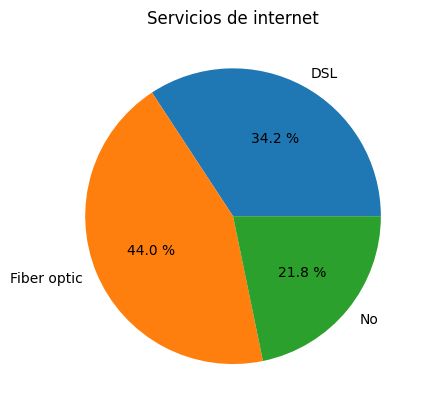

In [14]:
porcentaje_genero = (datos_cliente['Gender']=='Female').mean()
servicios_internet = datos_cliente['Internet_Service'].unique()

cantidad_servicios_internet= [(datos_cliente['Internet_Service']==i).sum() for i in servicios_internet]
# porcentaje_servicio_internet = (datos_cliente['Internet_Service']=='DSL').mean()
plt.pie(cantidad_servicios_internet,labels = servicios_internet, autopct="%0.1f %%")
plt.title('Servicios de internet')
plt.show()

Como son la cantidad de clientes que ya no estan los que necesitamos para responder, se observa como es la distrubucion de esta

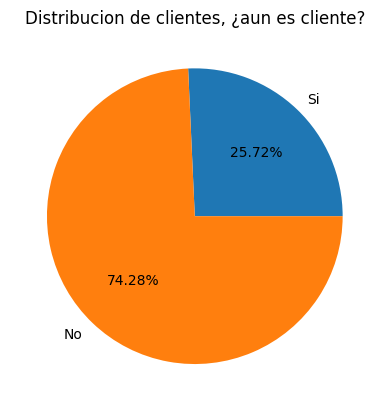

In [15]:
fig, ax=plt.subplots()
distribucion_cliente =estadisticas_columnas.loc['mean','Still_Customer']
ax.pie(x=[distribucion_cliente,1-distribucion_cliente],labels=['Si','No'],autopct='%0.2f%%')
ax.set_title('Distribucion de clientes, ¿aun es cliente?')
plt.show()

Recuento por variables categoricas como género, acompañante, si es mayor a 65, etc para saber si hay algo que determine o oriente al resultado de la baja de clientes

In [25]:
# se separan los que aun son clientes y los que aun no en distintos dataframes
agrupado_genero_senior=datos_cliente.groupby(['Still_Costumer','Gender'])['Senior_Citizen'].value_counts().reset_index()
genero_senior= pd.pivot(data = agrupado_genero_senior,index='Gender',columns='Senior_citizen',values='count')

# si_clientes=datos_cliente[datos_cliente['Still_Customer']==1]
# no_clientes=datos_cliente[datos_cliente['Still_Customer']==0]

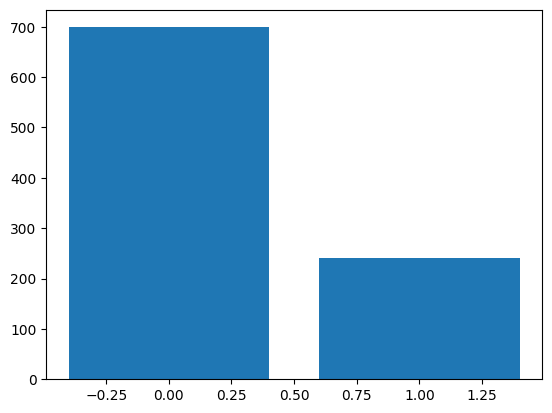

In [45]:
# personas mayores de 65 por genero
agrupados_si=si_clientes.groupby(['Gender'])['Senior_Citizen'].value_counts().reset_index()

agrupados_no = no_clientes.groupby(['Gender'])['Senior_Citizen'].value_counts().reset_index()
fig, ax= plt.subplots()
ax.bar(agrupados_si['Senior_Citizen'],agrupados_si['count'])
plt.show()


In [49]:
pd.pivot(data = datos_cliente,index='Gender',columns='Senior_Citizen',values='count')

KeyError: 'count'